# Limpieza de Datos de visitas19

### Librerias

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
sexo= {1:"Mujer", 2:"Hombre"}
escolaridad= {1:"Ninguna",2:"Preescolar",3:"Primaria", 4:"Secuandaria", 5:"Estudios técnicos con secundaria terminada", 6:"Normal básica", 7:"Preparatoria o bachillerato", 8:"Estudios técnicos con preparatoria terminada", 9:"Licenciatura", 10:"Maestría o doctorado", 99:"No especifica"}
generico={1:"Si", 2:"No", 99:"No especifica"}
ocupacion={1:"Funcionarios, directores y jefes", 2:"Profesionistas y técnicos", 3:"Trabajadores auxiliares en actividades administrativas",
          4:"Comerciantes, empleados en ventas y agentes de ventas", 5:"Trabajadores en servicios personales y vigilancia",6:"Trabajadores en actividades agrícolas, ganaderas, forestales, caza y pesca",
          7:"Trabajadores artesanales",8:"Operadores de maquinaria industrial, ensambladores, choferes y conductores de transporte", 9:"Trabajadores en actividades elementales y de apoyo", 
          10:"Busca trabajo", 11:"No trabaja", 98:"Insuficientemente especificada", 99:"No especificada"}
medio_e={1:"Maestro, compañeros de estudio o libros de texto", 2:"Conoce desde siempre este lugar",3:"Amigos, familiares o conocidos",
        4:"Por la televisión", 5:"Folleto, espectacular, anuncio o volante", 6:"Internet", 7:"Oficina turística o viaje turístico", 8:"Por la radio",
        9:"Periódico, revista o libro", 10:"Redes sociales", 11:"Por casualidad", 12:"Otro", 99:"No especificado"}
medio_t={1:"Vehículo particular", 2:"Transporte público", 3:"Transporte turístico", 4:"Taxi", 5:"Bicicleta",6:"Caminando", 7:"Otro", 9:"No especificado"}
timpo_t={1:"De 1 a 30 min", 2:"De 31 min a 1h", 3:"De 1.01 a 1.30 h", 4:"De 1.31 a 2 h", 5:"De 2.01 a 3 h", 6:"De 3.01 a 4 h", 7:"De 4.01 a 5 h",
        8:"De 5.01 y más", 9: "No especificado"}
ent_regis = {1:"Aguascalientes", 2:"Baja California",3:"Baja California Sur", 4:"Campeche", 5:"Campeche", 6:"Colima", 7:"Colima", 
             8:"Chihuahua", 9:"Ciudad de México", 10:"Durango", 11:"Guanajuato", 12:"Guerrero", 13:"Hidalgo", 14:"Jalisco", 
             15:"México", 16:"Michoacán de Ocampo", 17:"Morelos", 18:"Nayarit", 19:"Nuevo León", 20:"Oaxaca",21:"Puebla", 
             22:"Querétaro", 23:"Quintana Roo", 24:"San Luis Potosí", 25:"Sinaloa", 26:"Sonora", 27:"Sonora", 28:"Tamaulipas", 
             29:"Tlaxcala", 30:"Veracruz de Ignacio de la Llave", 31:"Yucatán", 32:"Zacatecas", 33:"Extranjera", 99:"No especificada"}


### Selección de columnas

In [5]:
dataframe_general= pd.read_csv('visita19.csv')
predataframe1=dataframe_general.iloc [:, [1,4,5,11,13,17,18,19,21]]
predaraframe2=dataframe_general.iloc [:, 23:66] 
dataframe_seleccion= pd.concat([predataframe1,predaraframe2], axis=1)

In [6]:
dataframe_seleccion.loc[dataframe_seleccion['SEXO,N,1,0'] == 1, 'SEXO,N,1,0'] = 'Hombre'
dataframe_seleccion.loc[dataframe_seleccion['SEXO,N,1,0'] == 2, 'SEXO,N,1,0'] = 'Mujer'

In [7]:
print(dataframe_seleccion['SEXO,N,1,0'])

0          Mujer
1          Mujer
2          Mujer
3         Hombre
4         Hombre
           ...  
186120    Hombre
186121     Mujer
186122    Hombre
186123     Mujer
186124     Mujer
Name: SEXO,N,1,0, Length: 186125, dtype: object


In [23]:
lis = dataframe_seleccion["EDAD,N,2,0"].unique()
#Creamos el dataframe que contendrá las clases
dat = pd.DataFrame(lis, columns=["EDAD,N,2,0"])
#Observamos las clases que tenemos
dat


,"EDAD,N,2,0"
0,56
1,24
2,31
3,19
4,50
...,...
82,96
83,92
84,91
85,98


In [24]:
#Tabla de frecuencias absolutas
#Obtenes las frecuencias absolutas de cada clase
datafi = pd.crosstab(index=dataframe_seleccion["EDAD,N,2,0"], columns = "Frecuencia absoluta")
dat=datafi
dat

col_0,Frecuencia absoluta
"EDAD,N,2,0",
12,934
13,1413
14,2000
15,3279
16,4894
...,...
95,2
96,5
97,3


In [25]:
#Tabbla de frecuencia relativa
datahi = 100 * dat["Frecuencia absoluta"] / 50
datahi = datahi.values
#Agregamos nueva columna de frecuentas relativas
dat["Frecuencia relativa"] = datahi 
dat

col_0,Frecuencia absoluta,Frecuencia relativa
"EDAD,N,2,0",,
12,934,1868.0
13,1413,2826.0
14,2000,4000.0
15,3279,6558.0
16,4894,9788.0
...,...,...
95,2,4.0
96,5,10.0
97,3,6.0


In [28]:
#Obtenemos las frecuencias absolutas acumuladas
#Sacamos una lista de los valores donde obtendremos la FI
Fi = dat["Frecuencia absoluta"].values

#Recorremos la lista para ir creando una nueva lista con las sumas
#Obtener la frecuencia absoluta acumulada
a = []
b = 0
for c in Fi:
    b = c + b
    a.append(b)

#Agregamos la nueva columna Fi al Dataframe dat
dat["Frecuencias absolutas acumuladas"] = a 
dat

col_0,Frecuencia absoluta,Frecuencia relativa,Frecuencias absolutas acumuladas
"EDAD,N,2,0",,,
12,934,1868.0,934
13,1413,2826.0,2347
14,2000,4000.0,4347
15,3279,6558.0,7626
16,4894,9788.0,12520
...,...,...,...
95,2,4.0,185041
96,5,10.0,185046
97,3,6.0,185049


In [30]:
#Recorremos lista para obtener la frecuencia relativa acumulada
Hi = dat["Frecuencia relativa"].values
#Obtenemos Hi
a = []
b = 0
for c in Hi:
    b = c + b
    a.append(b)

#Agregamos la nueva columna Hi al Dataframe
dat["Frecuencia relativa acumulada"] = a 

dat

col_0,Frecuencia absoluta,Frecuencia relativa,Frecuencias absolutas acumuladas,Frecuencia relativa acumulada
"EDAD,N,2,0",,,,
12,934,1868.0,934,1868.0
13,1413,2826.0,2347,4694.0
14,2000,4000.0,4347,8694.0
15,3279,6558.0,7626,15252.0
16,4894,9788.0,12520,25040.0
...,...,...,...,...
95,2,4.0,185041,370082.0
96,5,10.0,185046,370092.0
97,3,6.0,185049,370098.0


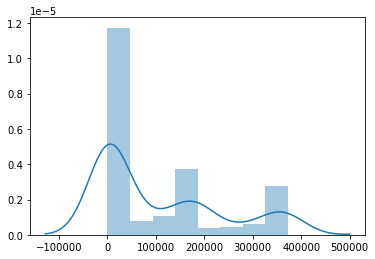